#  Create KDE Plots
we should find the best proirs for the most important hyperparameters:
1. we have at least 500 run with different configuration for each datasets
2. I have selected the best configuration(priors) that has best performance
3. Then we have a new dataframe for 200 differents datasets consist best configurations
4. Finally create KDe plot based the most important hyperparameter

# 1. import

In [4]:
# imports
import matplotlib
import matplotlib.pyplot as plt
from statistics import median
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
font = {
        'family' : 'serif',
        'size'   : 26}

matplotlib.rc('font', **font)

##### Note: Code below can produce all plots for 6 classifiers but Because each chart needed adjustments, I produced them separately

In [7]:
def cls_kde_plot(file_path,cls,important_hyperparameter,x1,x2,y1,y2,b=0,kernel=None,scale=None):
    
    
    #file_path="../PerformanceData/total/AB_results_total.csv"
    df= pd.read_csv(file_path)
    df_total=pd.DataFrame()


    for item in df.dataset.unique():

        df_dataset=df.loc[df['dataset'] == item ]
    
        df_dataset=df_dataset[df_dataset['CV_auc']<1.0]
     
        if df_dataset.empty:
            continue
        else:
            n=10 # top 10 best
            df_row=df_dataset.nlargest(10,'CV_auc')
 
        df_total = df_total.append(df_row)
    
    if kernel!= None:
        df_total=df_total[df_total[important_hyperparameter]==kernel]
        important_hyperparameter="gamma"
        
    plt.figure(figsize=(12,10))
    
    #set bandwidth for kde
    if b!= 0:
        sns.kdeplot(df_total[important_hyperparameter],bw=b,legend=False, color="#ed0dd9", linewidth=2)
    else:
        sns.kdeplot(df_total[important_hyperparameter], legend=False, color="#ed0dd9", linewidth=2)
        
    # if kernel != None:    
    #     plt.title(cls+"-"+kernel+":"+important_hyperparameter )
    # else: 
    #     plt.title(cls+":"+important_hyperparameter )
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.xticks(rotation=30)
    plt.xlabel("Hyperparameter value")
    plt.ylabel("Probability")
    if scale!=None:
        plt.xscale(scale)
        
    
    if kernel != None:    
        plt.savefig(f"../output/plots/{cls}_{important_hyperparameter}_{kernel}.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf' )
    else: 
        plt.savefig(f"../output/plots/{cls}_{important_hyperparameter}.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf')

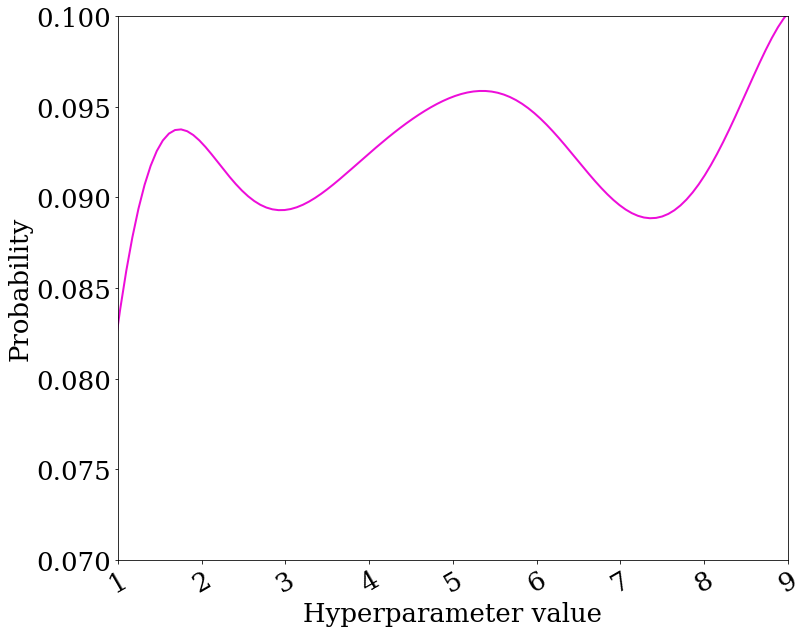

In [22]:
cls_kde_plot("../performance_data/AB_results_total.csv","Adaboost","max_depth",1,9,0.07,0.1,0.3)

# Decision Tree 

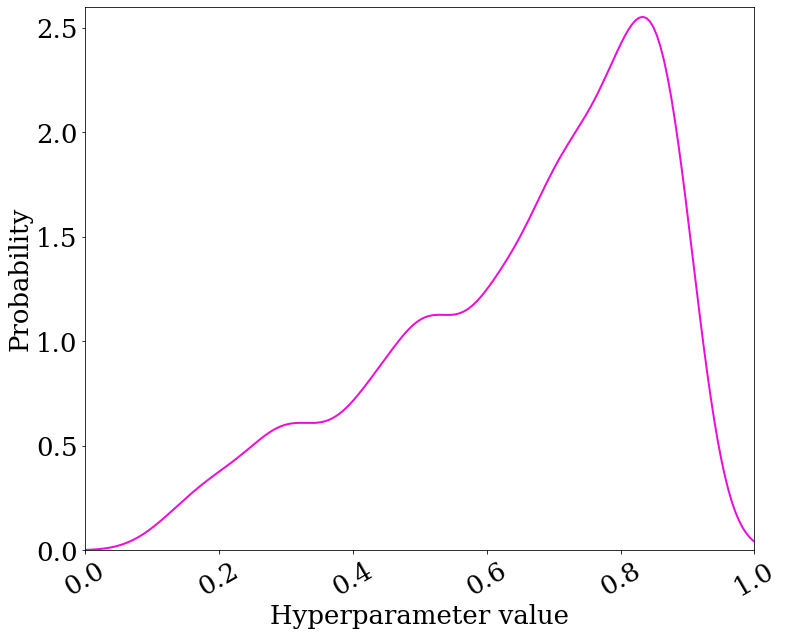

In [23]:
cls_kde_plot("../performance_data/DT_results_total.csv","Decision Tree","max_features",0,1,0,2.6)

# Random Forest

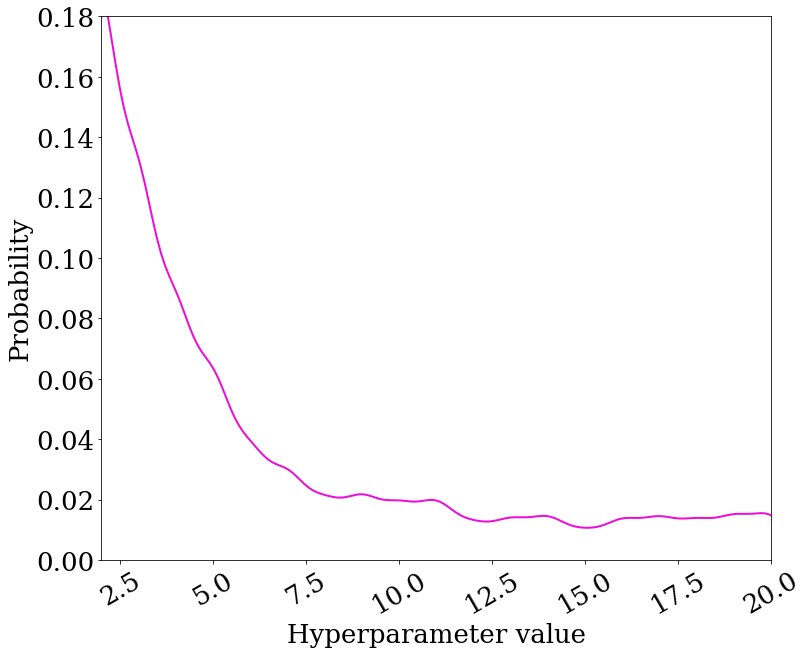

In [31]:
cls_kde_plot("../performance_data/RF_results_total.csv","Random Forest","min_samples_leaf",2,20,0.00,0.18,0.1)

# Extra Tree

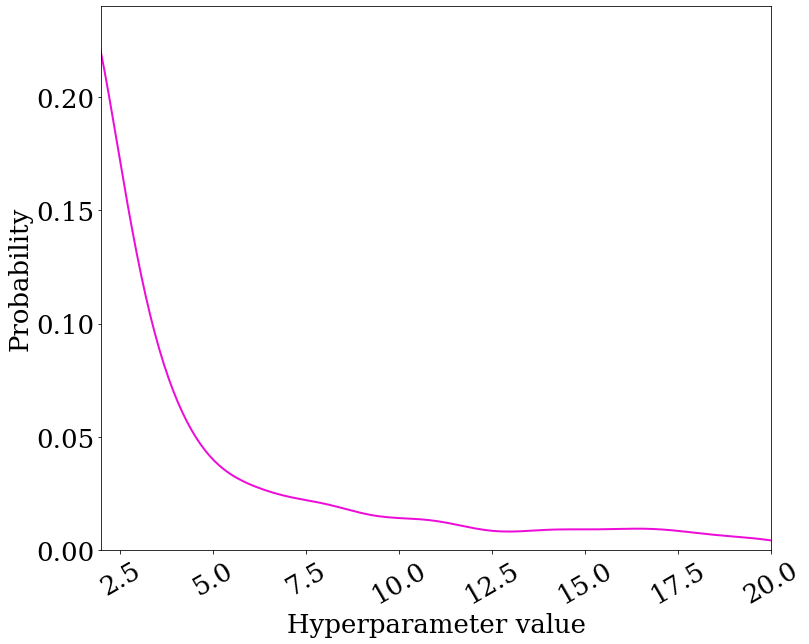

In [32]:
cls_kde_plot("../performance_data/ET_results_total.csv","Extra Tree","min_samples_leaf",2,20,0.00,0.24)

# Gradient Boosting

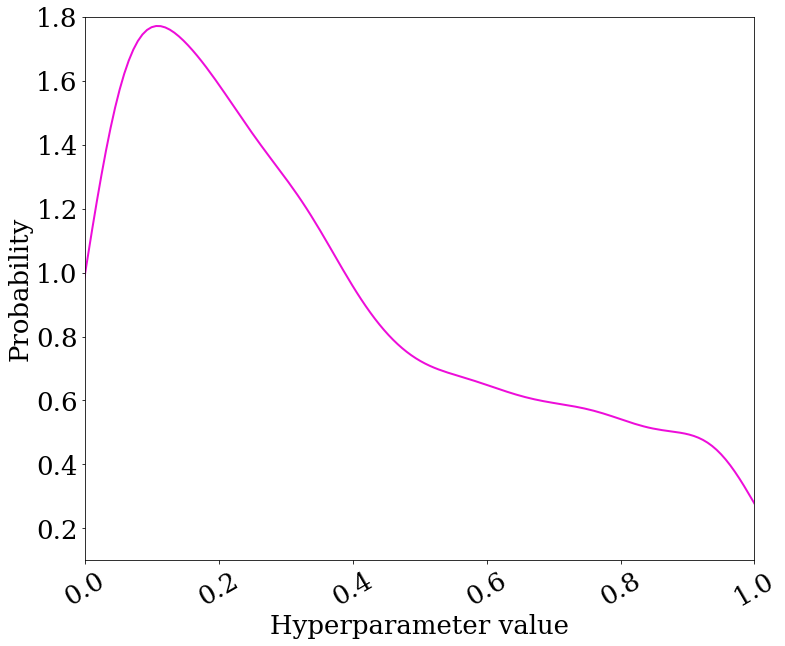

In [33]:
cls_kde_plot("../performance_data/GB_results_total.csv","Gradient Boosting","learning_rate",0,1,0.1,1.80)

#  SVM

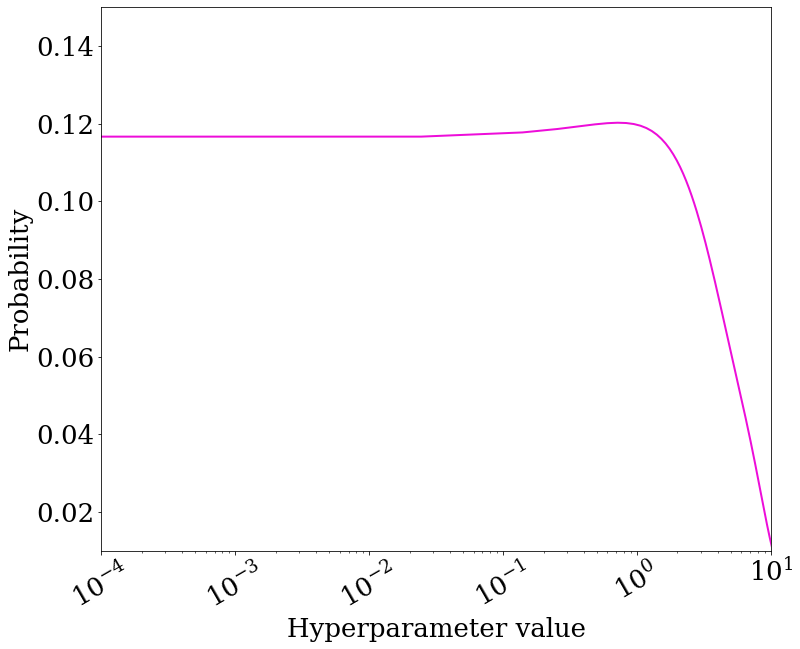

In [37]:
cls_kde_plot("../performance_data/SVM_results_total.csv","SVM","kernel",0.0001,10,0.01,0.15,1,kernel="sigmoid",scale="log")

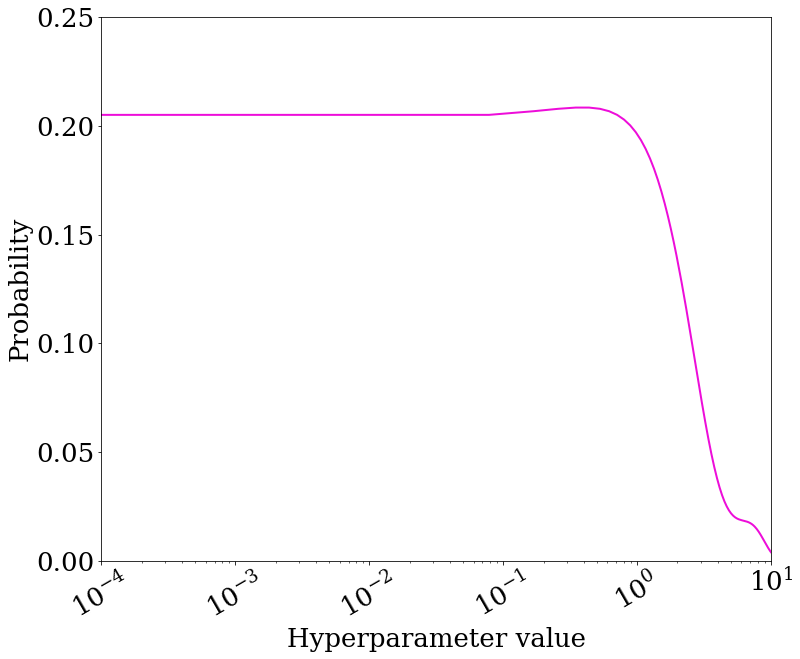

In [39]:
cls_kde_plot("../performance_data/SVM_results_total.csv","SVM","kernel",0.0001,10,0.0,0.25,0.9,kernel="rbf",scale="log")